<a href="https://colab.research.google.com/github/kamuyu-f9880/my_imdb/blob/main/My_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Engineering Project - Movies 500

To load both files you need to have them availible in your working directory


In [ ]:
# Importing packages

#Data manipulation and management
import pandas as pd #for data wrangling and cleaning
import numpy as np #working with numbers, algebra
import json #Json files
from operator import itemgetter #get certain values from keys
from collections import Counter #Counting number of times a word is in a list

#Visualizing
import matplotlib.pyplot as plt #plotting
from wordcloud import WordCloud #Wordcloud
import seaborn as sns #plotting

In [ ]:
# Loading data sets
credit_raw = pd.read_csv("tmdb_5000_credits.csv", sep = ",", header = 0) #with headers and "," as culumn separators
movie_info_raw = pd.read_csv("tmdb_5000_movies.csv", sep = ",", header = 0)

FileNotFoundError: ignored

In [ ]:
credit_raw.info()

NameError: ignored

In [ ]:
movie_info_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
credit_raw.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movie_info_raw.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


# Preprocessing
Stary by merging the two datasets together, and thereby selecting the wanted columns and turing them into the correct formats

In [ ]:
movie_info_raw.rename(columns = {"id":"movie_id"}, inplace = True) #renaming column to join on it

movies_raw = movie_info_raw.merge(credit_raw, on = "movie_id") #inner joining the dataframes on movie_id

movies_raw.info() #looking at the new dataframe, still 4803 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
#movies_raw["status"].unique() #Released, Post production & Rumored = no value for us

#Checking how many unique values there are in each column
movies_raw.nunique()

#a lot of redundant columns such as title_x, title_y, status, homepage, etc. that we are not going to use
#Can see that there are some movies with the same names, this has to be checked out

budget                   436
genres                  1175
homepage                1691
movie_id                4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title_x                 4800
vote_average              71
vote_count              1609
title_y                 4800
cast                    4761
crew                    4776
dtype: int64

In [ ]:
# Deleting the rows where the movie status is just Rumored or in Post Production, only released movies are relevant
movies_raw[(movies_raw["status"] == "Post Production") | (movies_raw["status"] == "Rumored")] #8 rows with this data in total

movies_raw = movies_raw[(movies_raw["status"] != "Post Production") & (movies_raw["status"] != "Rumored")].copy() #deleting posst production & ststus

#Deleting columns we are not going to use in our regression or otherwise, such as homepage, title_x, title_y, crew, tagline
movies_raw.drop(["homepage", "tagline", "title_x", "title_y",
                 "crew", "status", "movie_id", "overview",
                 "spoken_languages", "original_language"], axis = 1, inplace = True)

#Rearranging the columns
movies_raw = movies_raw[["original_title", "production_companies", "production_countries",
            "cast", "genres", "keywords", "release_date",
            "budget", "revenue", "popularity", "runtime", "vote_count", "vote_average"]]

movies_raw.reset_index(drop = True, inplace = True) #resetting index

movies_raw.head(1)


,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
0,Avatar,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",2009-12-10,237000000,2787965087,150.437577,162.0,11800,7.2


In [ ]:
# Checking column types, amount of rows and columns
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4795 non-null   object 
 1   production_companies  4795 non-null   object 
 2   production_countries  4795 non-null   object 
 3   cast                  4795 non-null   object 
 4   genres                4795 non-null   object 
 5   keywords              4795 non-null   object 
 6   release_date          4794 non-null   object 
 7   budget                4795 non-null   int64  
 8   revenue               4795 non-null   int64  
 9   popularity            4795 non-null   float64
 10  runtime               4793 non-null   float64
 11  vote_count            4795 non-null   int64  
 12  vote_average          4795 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 487.1+ KB


In [ ]:
json_movies = ["production_companies", "production_countries", "genres", "keywords", "cast"] #Names of columns with Json format

#Double loop, looping through each column with Json and then each row in that column

for factor in json_movies:
  movies_raw[factor] = movies_raw[factor].apply(json.loads) #Converting every json column to dictionary

  for row in movies_raw.index:
    movies_raw[factor][row] = list(map(itemgetter("name"), movies_raw[factor][row])) #looping through and collecting only the values from the key names


TypeError: ignored

In [ ]:
movies_raw.head(1)

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
0,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009-12-10,237000000,2787965087,150.437577,162.0,11800,7.2


In [ ]:
# Turning date column into actual dates
movies_raw["release_date"] = pd.to_datetime(movies_raw["release_date"])

NameError: ignored

In [ ]:
movies_raw.head(2)

NameError: ignored

In [ ]:
movies_raw.describe(include = "all", datetime_is_numeric = True)

#Can also see here that we have a lot of empty lists and 0 values in the number columns

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
count,4795,4795,4795,4795,4795,4795,4794,4.795000e+03,4.795000e+03,4795.000000,4793.000000,4795.000000,4795.000000
unique,4793,3695,469,4755,1175,4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Batman,[],[United States of America],[],[Drama],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,345,2973,41,369,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2002-12-23 14:34:05.556946048,2.909267e+07,8.239771e+07,21.527415,106.915084,691.360792,6.093306
min,NaN,NaN,NaN,NaN,NaN,NaN,1916-09-04 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1999-07-03 18:00:00,8.000000e+05,0.000000e+00,4.723880,94.000000,54.000000,5.600000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-30 00:00:00,1.500000e+07,1.925587e+07,12.963328,104.000000,236.000000,6.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-14 00:00:00,4.000000e+07,9.311911e+07,28.352222,118.000000,738.000000,6.800000
max,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-03 00:00:00,3.800000e+08,2.787965e+09,875.581305,338.000000,13752.000000,10.000000


## NAs, Duplicates and columns
Searching for NAs, (missing values) and duplicates in the dataset. NAs does not include 0 or epty lists []

In [ ]:
#Checking for NAs
movies_raw.isna().sum()

NameError: ignored

In [ ]:
#Looking at the two NAs in "runtime"

movies_raw[movies_raw["runtime"].isna()]
#Chiamatemi Francesco - Il Papa della gente --> runtime 98 min from IMDB
#To Be Frank, Sinatra at 100 --> runtime 81 min from IMDB

NameError: ignored

In [ ]:
# Filling in the two missing values on runtime
first_index = movies_raw.loc[movies_raw["original_title"] == "Chiamatemi Francesco - Il Papa della gente"].index #getting the index of this row
secound_index = movies_raw.loc[movies_raw["original_title"] == "To Be Frank, Sinatra at 100"].index #getting index of this row

movies_raw.at[first_index[0], "runtime"] = 98 #inserting runtime
movies_raw.at[secound_index[0], "runtime"] = 81 #inserting runtime

In [ ]:
# Looking at rows with NA on release date and deleting
movies_raw[movies_raw["release_date"].isna()] #just delete this one, does not have any information
movies_raw = movies_raw.dropna(subset = ["release_date"]) #deleting the one that had no values


In [ ]:
movies_raw[movies_raw.duplicated(["original_title"])] #see that there is two equal movie titles, but that wont effect any analysis

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
3692,Out of the Blue,[],[New Zealand],"[Karl Urban, Tandi Wright, Simon Ferry, Matthe...",[Drama],"[new zealand, gun rampage, police, independent...",2006-10-12,0,0,0.706355,103.0,18,5.9
4264,Batman,"[Twentieth Century Fox Film Corporation, DC Co...",[United States of America],"[Adam West, Burt Ward, Lee Meriwether, Cesar R...","[Family, Adventure, Comedy, Science Fiction, C...","[submarine, dc comics, missile, shark attack, ...",1966-07-30,1377800,0,9.815394,105.0,203,6.1


In [ ]:
movies_raw.loc[movies_raw["original_title"] == "Batman"] #realy dont need to remove these since these duplicates wont affect out analysis or review

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
1359,Batman,"[PolyGram Filmed Entertainment, The Guber-Pete...","[United Kingdom, United States of America]","[Jack Nicholson, Michael Keaton, Kim Basinger,...","[Fantasy, Action]","[double life, dc comics, dual identity, chemic...",1989-06-23,35000000,411348924,44.104469,126.0,2096,7.0
4264,Batman,"[Twentieth Century Fox Film Corporation, DC Co...",[United States of America],"[Adam West, Burt Ward, Lee Meriwether, Cesar R...","[Family, Adventure, Comedy, Science Fiction, C...","[submarine, dc comics, missile, shark attack, ...",1966-07-30,1377800,0,9.815394,105.0,203,6.1


## Looking at the character columns with lists

In [ ]:
# Looking at the Production companies
production = [] #empthy list

for row in movies_raw.index: #looping through each row

  for word in movies_raw["production_companies"][row]: #taking out each value in the string in each row
    production.append(word)

production_count = Counter(production) #counters

production_count #more than 5000

NameError: ignored

In [ ]:
#Looking at the production countries

countries = []

for row in movies_raw.index: #looping through each row

  for word in movies_raw["production_countries"][row]: #taking out each value in the string in each row
    countries.append(word)

countries_count = Counter(countries) #counters

countries_count

NameError: ignored

In [ ]:
#Looking at the non-english movie names
#len(movies_raw)
english = movies_raw[movies_raw.original_title.map(lambda x: x.isascii())].copy() #removing movies written with not english letters
english_titles = english["original_title"]
english_titles

removed_names = movies_raw[-movies_raw["original_title"].isin(english_titles)]

removed_names["original_title"].unique()


NameError: ignored

In [ ]:
# Looking at how many columns have empty lists
len(movies_raw[movies_raw["production_companies"].str.len() == 0])

344

In [ ]:
len(movies_raw[movies_raw["production_countries"].str.len() == 0])

170

In [ ]:
len(movies_raw[movies_raw["cast"].str.len() == 0])

40

In [ ]:
len(movies_raw[movies_raw["genres"].str.len() == 0])

27

In [ ]:
len(movies_raw[movies_raw["keywords"].str.len() == 0])

408

In [ ]:
# All in total if we do have no empty lists
test = movies_raw[(movies_raw["production_companies"].str.len() == 0) | (movies_raw["production_countries"].str.len() == 0) |
           (movies_raw["cast"].str.len() == 0) | (movies_raw["genres"].str.len() == 0) |
           (movies_raw["keywords"].str.len() == 0)]

len(test)

NameError: ignored

In [ ]:
see = movies_raw[(movies_raw["budget"] != 0) & (movies_raw["revenue"] != 0) & (movies_raw["popularity"] != 0) & (movies_raw["runtime"] != 0) &
         (movies_raw["vote_count"] != 0) & (movies_raw["vote_average"] != 0)]

see["release_date"] = see ["release_date"].dt.year #creating a column with year

# Movies need more than 30 votes, runtime 205, popularity at 95% interval & revenue at 95% interval & budget 95% interval
see = see[(see["vote_count"] >= 30) & (see["runtime"] <= 205) & (see["popularity"] <= 67.401) & (see["revenue"] <= 3.695244e+08) &
          (see["release_date"] >= 1990) & (see["budget"] <= 1.150000e+08)]

see = see[(see["production_companies"].str.len() != 0) | (see["production_countries"].str.len() != 0) |
           (see["cast"].str.len() != 0) | (see["genres"].str.len() != 0) |
           (see["keywords"].str.len() != 0)]

len(see)


<ipython-input-45-e8e269a7561e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  see["release_date"] = see ["release_date"].dt.year #creating a column with year


2292

In [ ]:
english = test [test.original_title.map(lambda x: x.isascii())].copy() #removing movies written with not english letters
english_titles = english["original_title"]
english_titles

removed_names = test[-test["original_title"].isin(english_titles)]

removed_names["original_title"].unique()

NameError: ignored

## Looking at the Value columns

Going to take a look at all the columns with numbers, watch for outliers, missing values / 0, correlations

In [ ]:
#Creating a copy of the columns with values to look at the data closer, see we have some 0 and some high ones
df_movie = movies_raw[["release_date", "budget", "revenue", "popularity", "runtime", "vote_count", "vote_average"]].copy()

df_movie["release_date"] = df_movie["release_date"].dt.year #creating a column with year

df_movie.describe(percentiles = [.05, .25, .5, .75, .95], include = "all").round(decimals = 3)

NameError: ignored

In [ ]:
len(df_movie[df_movie["vote_count"] >= 30])

3946

In [ ]:
df_movie.corr()

,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
release_date,1.000000,0.169803,0.090738,0.102715,-0.166769,0.114825,-0.198630
budget,0.169803,1.000000,0.730671,0.504981,0.269532,0.592894,0.092415
revenue,0.090738,0.730671,1.000000,0.644516,0.251146,0.781374,0.197594
popularity,0.102715,0.504981,0.644516,1.000000,0.225053,0.777985,0.274671
runtime,-0.166769,0.269532,0.251146,0.225053,1.000000,0.271987,0.376465
vote_count,0.114825,0.592894,0.781374,0.777985,0.271987,1.000000,0.314210
vote_average,-0.198630,0.092415,0.197594,0.274671,0.376465,0.314210,1.000000


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'revenue'}>],
       [<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'vote_average'}>]], dtype=object)

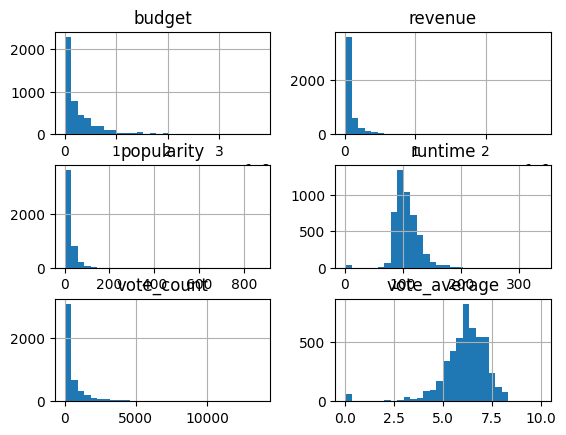

In [ ]:
df_movie.hist(column = ["budget", "revenue", "popularity", "runtime", "vote_count", "vote_average"], bins = 30)

In [ ]:
movies_raw[movies_raw["runtime"] >= 180]

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
24,King Kong,"[WingNut Films, Universal Pictures, Big Primat...","[New Zealand, United States of America, Germany]","[Naomi Watts, Jack Black, Adrien Brody, Thomas...","[Adventure, Drama, Action]","[film business, screenplay, show business, fil...",2005-12-14,207000000,550000000,61.226010,187.0,2337,6.6
25,Titanic,"[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],"[Kate Winslet, Leonardo DiCaprio, Frances Fish...","[Drama, Romance, Thriller]","[shipwreck, iceberg, ship, panic, titanic, oce...",1997-11-18,200000000,1845034188,100.025899,194.0,7562,7.5
110,Pearl Harbor,"[Jerry Bruckheimer Films, Touchstone Pictures]",[United States of America],"[Ben Affleck, Josh Hartnett, Kate Beckinsale, ...","[History, Romance, War]","[nurse, patriotism, hawaii, world war ii, pilo...",2001-05-21,140000000,449220945,34.206690,183.0,1791,6.6
298,The Wolf of Wall Street,"[Paramount Pictures, Appian Way, EMJAG Product...",[United States of America],"[Leonardo DiCaprio, Jonah Hill, Margot Robbie,...","[Crime, Drama, Comedy]","[corruption, sex, sexuality, bank, humor, biog...",2013-12-25,100000000,392000694,95.007934,180.0,6571,7.9
329,The Lord of the Rings: The Return of the King,"[WingNut Films, New Line Cinema]","[New Zealand, United States of America]","[Elijah Wood, Ian McKellen, Viggo Mortensen, L...","[Adventure, Fantasy, Action]","[elves, orcs, middle-earth (tolkien), based on...",2003-12-01,94000000,1118888979,123.630332,201.0,8064,8.1
676,Wyatt Earp,"[Tig Productions, Warner Bros., Kasdan Picture...",[United States of America],"[Kevin Costner, Dennis Quaid, Gene Hackman, Da...","[Drama, Action, Western]","[gunslinger, gambling, sheriff, deputy sheriff...",1994-06-24,63000000,25052000,13.859307,191.0,202,6.5
690,The Green Mile,"[Castle Rock Entertainment, Darkwoods Producti...",[United States of America],"[Tom Hanks, Michael Clarke Duncan, David Morse...","[Fantasy, Drama, Crime]","[southern usa, black people, mentally disabled...",1999-12-10,60000000,284600000,103.698022,189.0,4048,8.2
855,Gods and Generals,"[Warner Bros. Pictures, Turner Pictures, Antie...",[United States of America],"[Stephen Lang, Jeff Daniels, Robert Duvall, Ke...","[Drama, History, War]","[war, battle, union soldier, confederate soldi...",2003-02-21,56000000,12923936,4.362535,214.0,48,6.1
880,Grindhouse,"[Big Talk Productions, Yer Dead Productions, W...",[United States of America],"[Kurt Russell, Zoë Bell, Rosario Dawson, Vanes...","[Thriller, Action, Horror]","[exploitation, slasher, zombie, killer]",2007-04-06,67000000,25037897,16.637642,191.0,459,6.8
1091,Nixon,"[Hollywood Pictures, Cinergi Pictures Entertai...",[United States of America],"[Anthony Hopkins, Joan Allen, Powers Boothe, E...","[History, Drama]","[usa president, presidential election, waterga...",1995-12-22,44000000,13681765,3.770161,192.0,71,7.1


Maybe suggest minimal sample size to 30 votes?
https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=A%20sample%20size%20of%2030,representative%20of%20your%20population%20set.

In [ ]:
df_movie_old = df_movie[df_movie["release_date"] < 1990].copy()

df_movie_old.describe(percentiles = [.05, .25, .5, .75, .95], include = "all").round(decimals = 3)

,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
count,530.000,5.300000e+02,5.300000e+02,530.000,530.000,530.000,530.000
mean,1974.677,9.354337e+06,5.173408e+07,18.306,115.238,488.140,6.614
std,14.292,1.203825e+07,9.550216e+07,20.450,27.487,869.784,0.981
min,1916.000,0.000000e+00,0.000000e+00,0.000,25.000,0.000,0.000
5%,1942.000,0.000000e+00,0.000000e+00,0.630,87.000,8.000,4.900
25%,1968.250,1.000000e+06,2.166022e+06,4.464,97.000,53.250,6.100
50%,1980.000,4.500000e+06,1.574759e+07,11.508,109.000,175.000,6.700
75%,1985.000,1.500000e+07,5.416156e+07,24.473,125.000,530.750,7.300
95%,1989.000,3.325750e+07,2.271995e+08,59.098,172.000,2086.250,7.955
max,1989.000,9.262000e+07,7.929106e+08,143.660,248.000,6624.000,8.400


In [ ]:
df_movie_old

,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
379,1982,20000000,79114085,31.802807,129.0,650,6.6
409,1979,0,37823676,5.159407,123.0,85,7.3
417,1982,8000000,21028755,13.661289,120.0,226,6.7
587,1989,70000000,90000098,24.961625,139.0,808,7.1
655,1984,4200000,38376497,11.743085,114.0,215,6.4
...,...,...,...,...,...,...,...
4738,1962,62000,0,2.407048,82.0,32,4.4
4744,1983,0,0,0.557602,99.0,2,6.0
4758,1978,0,321952,3.277287,117.0,64,7.9
4766,1971,27000,0,0.027811,64.0,9,6.0


In [ ]:
# Testing possible ways to filter
# Fisrt taking away all the places where we have 0
see = df_movie[(df_movie["budget"] != 0) & (df_movie["revenue"] != 0) & (df_movie["popularity"] != 0) & (df_movie["runtime"] != 0) &
         (df_movie["vote_count"] != 0) & (df_movie["vote_average"] != 0)]

# Movies need more than 30 votes, runtime 205, popularity at 95% interval & revenue at 95% interval & budget 95% interval
see = see[(see["vote_count"] >= 30) & (see["runtime"] <= 205) & (see["popularity"] <= 67.401) & (see["revenue"] <= 3.695244e+08) &
          (see["release_date"] >= 1990) & (see["budget"] <= 1.150000e+08)]

#see.corr()
see.hist(column = ["budget", "revenue", "popularity", "runtime", "vote_count", "vote_average"], bins = 30)
#see

NameError: ignored

In [ ]:

see.describe(percentiles = [.05, .25, .5, .75, .95], include = "all").round(decimals = 3)

,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
count,2292.000,2.292000e+03,2.292000e+03,2292.000,2292.000,2292.000,2292.000
mean,2005.437,3.347709e+07,7.722077e+07,22.674,108.028,663.099,6.208
std,6.328,2.591501e+07,7.703648e+07,14.761,17.338,694.876,0.794
min,1990.000,7.000000e+00,5.000000e+00,0.212,63.000,30.000,3.000
5%,1994.000,2.087604e+06,1.657095e+06,4.349,85.000,57.000,4.900
25%,2001.000,1.300000e+07,1.823941e+07,11.081,96.000,195.000,5.700
50%,2006.000,2.700000e+07,5.127048e+07,19.276,105.000,431.500,6.200
75%,2011.000,5.000000e+07,1.137505e+08,31.691,118.000,877.500,6.800
95%,2015.000,8.500000e+07,2.411206e+08,52.216,139.000,2036.800,7.400
max,2016.000,1.150000e+08,3.688758e+08,67.338,202.000,4742.000,8.200


### Testing to make column of each category



In [ ]:
test = movies_raw.explode("genres")

test_boxplot = movies_raw.explode("genres")

test.head(2)

NameError: ignored

In [ ]:
#horizontal boxplot

#test_boxplot.boxplot(column="popularity", by="genres", vert = False)
import seaborn as sns

sns.boxplot(y=test_boxplot["genres"], x=test_boxplot["popularity"])


NameError: ignored

In [ ]:
test = test.pivot(columns = "genres", values = "genres")
test.head(2)


NameError: ignored

In [ ]:
test = test.fillna(0)
test = test.replace("[A-Z]", 1, regex = True)
test

NameError: ignored

In [ ]:
#test.reset_index()
se = pd.concat([movies_raw, test], axis = 1)
se.corr()


NameError: ignored

In [ ]:
se

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009-12-10,237000000,2787965087,150.437577,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",2007-05-19,300000000,961000000,139.082615,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",2015-10-26,245000000,880674609,107.376788,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",2012-07-16,250000000,1084939099,112.312950,...,0,0,0,0,0,0,0,1,0,0
4,John Carter,[Walt Disney Pictures],[United States of America],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",2012-03-07,260000000,284139100,43.926995,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,El Mariachi,[Columbia Pictures],"[Mexico, United States of America]","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",1992-09-04,220000,2040920,14.269792,...,0,0,0,0,0,0,0,1,0,0
4791,Newlyweds,[],[],"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[Comedy, Romance]",[],2011-12-26,9000,0,0.642552,...,0,0,0,0,1,0,0,0,0,0
4792,"Signed, Sealed, Delivered","[Front Street Pictures, Muse Entertainment Ent...",[United States of America],"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...",2013-10-13,0,0,1.444476,...,0,0,0,0,1,0,1,0,0,0
4793,Shanghai Calling,[],"[United States of America, China]","[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[],[],2012-05-03,0,0,0.857008,...,0,0,0,0,0,0,0,0,0,0


#### Plotting correlation between genre and maybe popularity, vote_average or revenue

In [ ]:
corr = se.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-165-39042d047de4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = se.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,budget,revenue,popularity,runtime,vote_count,vote_average,nan,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
budget,1.000000,0.730671,0.504981,0.269532,0.592894,0.092415,nan,0.310210,0.405923,0.207789,-0.068362,-0.012635,-0.098929,-0.196815,0.184363,0.263504,-0.059004,0.004089,-0.124231,-0.064872,0.011302,-0.102938,0.198711,-0.028050,0.043049,0.026712,-0.006541
revenue,0.730671,1.000000,0.644516,0.251146,0.781374,0.197594,nan,0.203473,0.344125,0.199178,-0.050262,-0.041133,-0.067849,-0.177294,0.170286,0.212062,-0.042555,-0.031621,-0.083112,-0.041751,-0.007063,-0.065608,0.152800,-0.020678,-0.004587,0.001880,-0.029280
popularity,0.504981,0.644516,1.000000,0.225053,0.777985,0.274671,nan,0.166810,0.247508,0.122990,-0.076745,0.017108,-0.084101,-0.112153,0.069040,0.145372,-0.055348,-0.026581,-0.035423,-0.053063,0.026851,-0.083452,0.166716,-0.019450,0.055984,0.012414,-0.013659
runtime,0.269532,0.251146,0.225053,1.000000,0.271987,0.376465,nan,0.090618,0.086856,-0.171104,-0.227082,0.050087,-0.088773,0.272539,-0.148301,0.004817,0.013841,0.267173,-0.169915,0.026642,0.033074,0.052526,0.008931,-0.038685,0.016679,0.194632,0.061069
vote_count,0.592894,0.781374,0.777985,0.271987,1.000000,0.314210,nan,0.202858,0.265797,0.101718,-0.099889,0.020383,-0.076591,-0.122485,0.059499,0.159489,-0.046576,-0.034307,-0.055369,-0.063418,0.024380,-0.091601,0.211167,-0.015945,0.040158,0.009280,-0.008933
vote_average,0.092415,0.197594,0.274671,0.376465,0.314210,1.000000,nan,-0.049317,0.023344,0.047112,-0.094906,0.062339,0.025807,0.238275,-0.018333,0.000557,0.018395,0.109033,-0.137366,0.044067,0.021054,0.046464,-0.025863,-0.014882,-0.042428,0.091811,0.009276
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Action,0.310210,0.203473,0.166810,0.090618,0.202858,-0.049317,nan,1.000000,0.361778,-0.068584,-0.158977,0.150465,-0.076012,-0.207378,-0.096615,0.072235,-0.018479,0.026111,-0.076693,-0.089937,-0.050218,-0.190265,0.228924,-0.011050,0.266491,0.058235,0.057509
Adventure,0.405923,0.344125,0.247508,0.086856,0.265797,0.023344,nan,0.361778,1.000000,0.196854,-0.070480,-0.093678,-0.060208,-0.219152,0.230520,0.237883,-0.024140,-0.015475,-0.118576,-0.068558,-0.044092,-0.117206,0.209102,-0.018160,-0.008420,0.020655,0.036804
Animation,0.207789,0.199178,0.122990,-0.171104,0.101718,0.047112,nan,-0.068584,0.196854,1.000000,0.083061,-0.093356,-0.034553,-0.179993,0.532869,0.137415,-0.007609,-0.046894,-0.078930,0.024979,-0.059646,-0.088491,0.012108,0.014456,-0.129558,-0.034192,-0.014951


# Exploratory analysis - Visualization
Creating different graphs and overviews for the Exploratory part

## Plotting genres
Looking at how many movies are in each genre by wordcloud and barplot

In [ ]:
word_genres = []

for row in movies_raw.index:

  for word in movies_raw["genres"][row]:
    word_genres.append(word)

NameError: ignored

In [ ]:
print(set(word_genres), len(set(word_genres))) #unique genres and the number of genras

{'Crime', 'Adventure', 'Horror', 'Western', 'Family', 'War', 'Fantasy', 'Thriller', 'TV Movie', 'Comedy', 'Animation', 'Documentary', 'Science Fiction', 'Action', 'Drama', 'History', 'Mystery', 'Music', 'Romance', 'Foreign'} 20


In [ ]:
word_genres_string = Counter(word_genres) #counters

word_genres_string

Counter()

In [ ]:
# Generating Wordcloud
wordcloud = WordCloud(background_color = "white").generate_from_frequencies(word_genres_string)

#plotting
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off") #take away axis
plt.tight_layout(pad = 0)
plt.show()

ValueError: ignored

In [ ]:
word_genres_string.keys()

dict_keys(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie'])

In [ ]:
word_genres_string.values()

dict_values([1153, 790, 424, 534, 696, 2292, 1272, 234, 512, 82, 1718, 893, 519, 348, 197, 144, 185, 109, 34, 8])

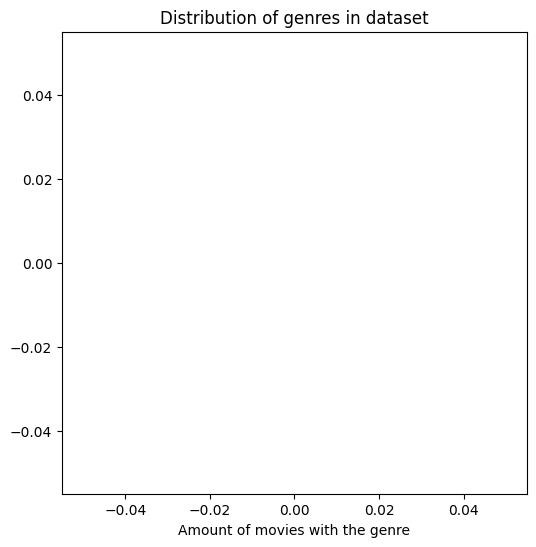

In [ ]:
#Creating a df out of the genres and the amount of movies in that genre
df_bar_genres = pd.DataFrame ({
    "Genre": word_genres_string.keys(),
    "Count": word_genres_string.values()
})

df_bar_genres = df_bar_genres.sort_values(by = ["Count"])
cmap = plt.cm.tab10 #old color scheme

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(6,6)

# Create horizontal bars
ax.barh(y=df_bar_genres.Genre, width=df_bar_genres.Count, #plotting
        color = cmap(np.arange(len(df_bar_genres))% cmap.N)); #coloring
ax.set_title('Distribution of genres in dataset'); #title
ax.set_xlabel('Amount of movies with the genre'); #x axis title

plt.show()

## How may movies each year

In [ ]:
df_year = movies_raw.copy() #creating a new dataset

df_year["year"] = df_year["release_date"].dt.year #creating a column with year

df_year = df_year.groupby(["year"])["year"].count().reset_index(name = "count")

df_year.head(5)

NameError: ignored

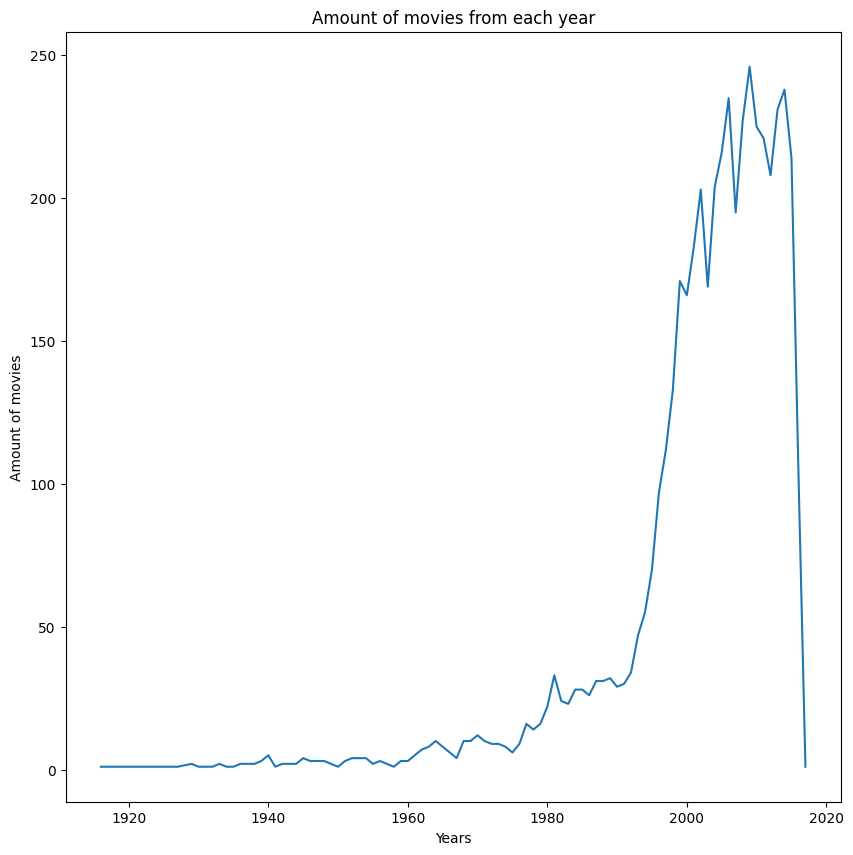

In [ ]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(10,10)

# Create horizontal bars
ax.plot(df_year["year"], df_year["count"]); #coloring
ax.set_title('Amount of movies from each year'); #title
ax.set_xlabel('Years'); #x axis title
ax.set_ylabel("Amount of movies")

plt.show()

## The top 20 rated movies

With more than 30 votes at least

In [ ]:
df_top_movies = movies_raw[movies_raw["vote_count"] >= 30] #filter out all movies with less then 30 votes

df_top_movies = df_top_movies.sort_values("vote_average", ascending = False) #sorting df

df_top_movies = df_top_movies[df_top_movies.original_title.map(lambda x: x.isascii())] #removing movies written with not english letters

top_20 = df_top_movies.iloc[:20].copy() #Taking the top 20
top_20 = top_20.sort_values(by = ["vote_average"]) #highest one above

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(10,6)

# Create horizontal bars
ax.barh(y=top_20.original_title, width= top_20.vote_average); #coloring
ax.set_title('Top 20 rated movies'); #title
ax.set_xlabel('Rating'); #x axis title
ax.set_ylabel("Movie")

plt.show()


NameError: ignored

In [ ]:

df_top_movies = movies_raw[movies_raw["vote_count"] >= 30]

df_top_movies = df_top_movies.sort_values("vote_average", ascending = False)

top_20 = df_top_movies.iloc[:20].copy()
top_20 = top_20.sort_values(by = ["vote_average"])

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(10,6)

# Create horizontal bars
ax.barh(y=top_20.original_title, width= top_20.vote_average); #coloring
ax.set_title('Top 20 rated movies'); #title
ax.set_xlabel('Rating'); #x axis title
ax.set_ylabel("Movie")

plt.show()

NameError: ignored

In [ ]:
movies_raw.head(1)

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
0,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009-12-10,237000000,2787965087,150.437577,162.0,11800,7.2


## Wordcloud keywords in movies

In [ ]:
keywords = []

for row in movies_raw.index:

  for word in movies_raw["keywords"][row]:
    keywords.append(word)

#len(keywords)

keyword_count = Counter(keywords) #counters

len(keyword_count)

NameError: ignored

In [ ]:
keywords_count = Counter(keywords) #counters

# Generating Wordcloud
wordcloud = WordCloud(background_color = "white", max_words = 30).generate_from_frequencies(keywords_count)

#plotting
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off") #take away axis
plt.tight_layout(pad = 0)
plt.show()

ValueError: ignored

## Revenue + Budget

In [ ]:
movies_raw

,original_title,production_companies,production_countries,cast,genres,keywords,release_date,budget,revenue,popularity,runtime,vote_count,vote_average
0,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009-12-10,237000000,2787965087,150.437577,162.0,11800,7.2
1,Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",2007-05-19,300000000,961000000,139.082615,169.0,4500,6.9
2,Spectre,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",2015-10-26,245000000,880674609,107.376788,148.0,4466,6.3
3,The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],"[Christian Bale, Michael Caine, Gary Oldman, A...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",2012-07-16,250000000,1084939099,112.312950,165.0,9106,7.6
4,John Carter,[Walt Disney Pictures],[United States of America],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",2012-03-07,260000000,284139100,43.926995,132.0,2124,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,[Columbia Pictures],"[Mexico, United States of America]","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",1992-09-04,220000,2040920,14.269792,81.0,238,6.6
4799,Newlyweds,[],[],"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[Comedy, Romance]",[],2011-12-26,9000,0,0.642552,85.0,5,5.9
4800,"Signed, Sealed, Delivered","[Front Street Pictures, Muse Entertainment Ent...",[United States of America],"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...",2013-10-13,0,0,1.444476,120.0,6,7.0
4801,Shanghai Calling,[],"[United States of America, China]","[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[],[],2012-05-03,0,0,0.857008,98.0,7,5.7


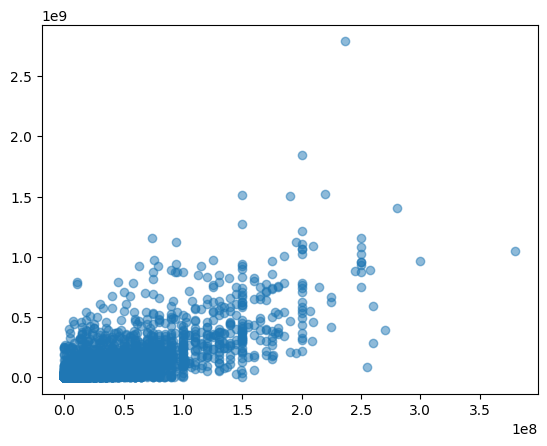

In [ ]:
plt.scatter(movies_raw["budget"], movies_raw["revenue"], alpha=0.5)
plt.show()

In [ ]:
df_top_movies = movies_raw[movies_raw["vote_count"] >= 30]

df_top_movies = df_top_movies.sort_values("vote_average", ascending = False)

df_top_movies = df_top_movies[df_top_movies.original_title.map(lambda x: x.isascii())] #removing movies written with not english letters

top_20 = df_top_movies.iloc[:20].copy()
top_20 = top_20.sort_values(by = ["vote_average"])
top_20.set_index("original_title", inplace = True)
# Initialize a Figure and an Axes
fig = plt.figure()

ax = fig.add_subplot()
ax2 = ax.twinx()

width = 0.4
# Fig size

top_20.budget.plot(kind = "bar", color = "red", ax = ax, width = 0.4, position = 1)
top_20.revenue.plot(kind = "bar", color = "blue", ax = ax2, width = 0.4, position = 0)

# Create horizontal bars
ax.set_ylabel('Budget RED') #x axis title
ax2.set_ylabel("Revenue BLUE")
ax.set_xlabel("Movies")

plt.show()

NameError: ignored

## Most Profitable Movies


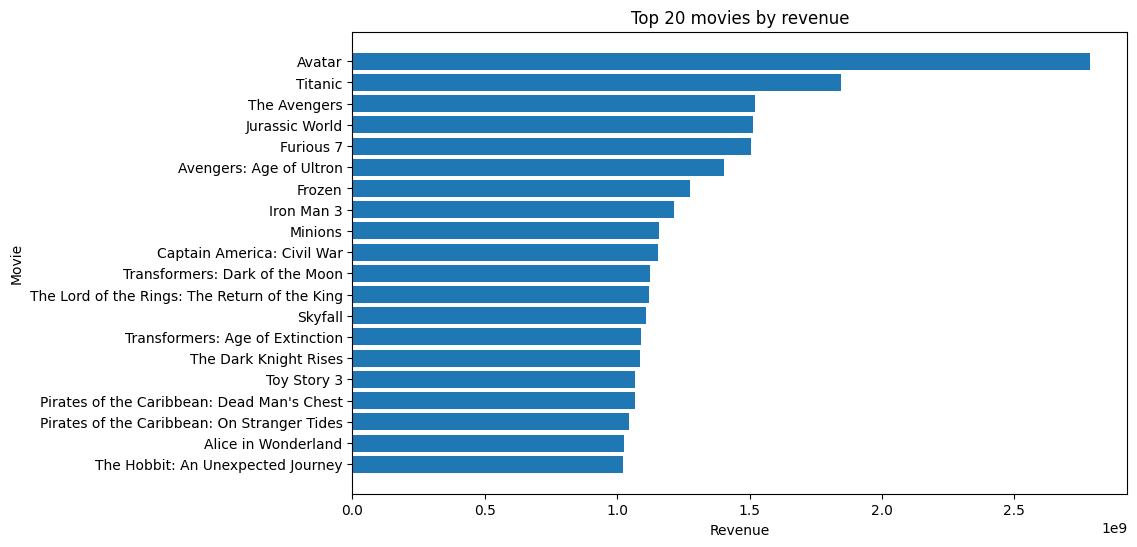

In [ ]:
df_profit = movies_raw.sort_values(by = ["revenue"], ascending = False)

top_20_profit = df_profit.iloc[:20].copy() #only keeping top 20
top_20_profit = top_20_profit.sort_values(by = ["revenue"]) #to get the values in correct order in the graph


#plotting
fig, ax = plt.subplots() # Initialize a Figure and an Axes
fig.set_size_inches(10,6) # Fig size

# Create horizontal bars
ax.barh(y=top_20_profit.original_title, width= top_20_profit.revenue);
ax.set_title('Top 20 movies by revenue'); #title
ax.set_xlabel('Revenue'); #x axis title
ax.set_ylabel("Movie")

plt.show()


In [ ]:
plt.scatter(movies_raw["vote_average"], movies_raw["popularity"], alpha=0.5)
plt.show()

NameError: ignored

## Actors

In [ ]:
actors = []

for row in movies_raw.index:

  for word in movies_raw["cast"][row]:
    actors.append(word)

NameError: ignored

In [ ]:
actors_count = Counter(actors) #counters

#Creating a df out of the genres and the amount of movies in that genre
df_actors = pd.DataFrame ({
    "Actor": actors_count.keys(),
    "Count": actors_count.values()
})

df_actors = df_actors.sort_values(by = ["Count"], ascending = False)

df_actors = df_actors[df_actors["Count"] >= 20] #cant take them all

df_actors

,Actor,Count


### Actors - Rating + popularity + revenue

In [ ]:
# This one needs some work, to many random actors

actor_df = movies_raw[movies_raw["vote_count"] >= 30]

actor_df = actor_df.explode("cast") #Taking out so that all actors have their own line with the movies

actor_mean = actor_df.groupby(["cast"])["budget", "revenue", "popularity", "vote_average"].mean()

actor_mean.sort_values(by = ["vote_average"], ascending = False)

NameError: ignored

In [ ]:
movies_raw.corr()

<ipython-input-45-650db0d75ecd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_raw.corr()


,budget,revenue,popularity,runtime,vote_count,vote_average
budget,1.000000,0.730671,0.504981,0.269532,0.592894,0.092415
revenue,0.730671,1.000000,0.644516,0.251146,0.781374,0.197594
popularity,0.504981,0.644516,1.000000,0.225053,0.777985,0.274671
runtime,0.269532,0.251146,0.225053,1.000000,0.271987,0.376465
vote_count,0.592894,0.781374,0.777985,0.271987,1.000000,0.314210
vote_average,0.092415,0.197594,0.274671,0.376465,0.314210,1.000000


## Ideas to show?

*  most profitable movies
*  Chart the most popular actors
*  Chart popularity + genre
*  Chart actor + rating  !!
*  Chart actor + budget?
*  
*  See how many movies from each country, maybe take away chinese? also need to go through each column to check for missing values.

# Machine Learning Part
(We need to finalize the dataset first)

# Testing Area Below

In [ ]:
test = movies_raw[["genres","production_countries"]].copy()

test["genres"] = test["genres"].apply(json.loads).copy()

names = []
for item in test["genres"][0]:
  names.append(item["name"])

print(names)

NameError: ignored

In [ ]:
#movies_raw["cast"] = movies_raw["cast"].apply(json.loads) #turning to dictionary
#for row in movies_raw.index:
#  movies_raw["cast"][row] = list(map(itemgetter("name"), movies_raw["cast"][row])) #looping through and collecting only the names

In [ ]:
df_top_movies = movies_raw[movies_raw["vote_count"] >= 30]

df_top_movies = df_top_movies.sort_values("vote_average", ascending = False)

top_20 = df_top_movies.iloc[:20].copy()
top_20 = top_20.sort_values(by = ["vote_average"])
top_20.set_index("original_title", inplace = True)

NameError: ignored